In [1]:
# Main imports
%matplotlib inline

import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')

In [15]:
# Read Data
df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2021-10-27')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-10-21,3440.280029,3403.000000,3414.250000,3435.010010,1881400,3435.010010
2021-10-22,3429.840088,3331.300049,3421.000000,3335.550049,3139100,3335.550049
2021-10-25,3347.800049,3297.699951,3335.000000,3320.370117,2226000,3320.370117


In [3]:
df.shape

(2472, 6)

In [4]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [5]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2021-12-12'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2698300
2021-10-27,3388.000000,3437.000000,3371.449951,3392.489990,3392.489990,2702200
2021-10-28,3402.100098,3479.000000,3386.000000,3446.570068,3446.570068,5708700
2021-10-29,3300.020020,3374.820068,3273.320068,3372.429932,3372.429932,6469500
2021-11-01,3361.800049,3375.860107,3292.020020,3318.110107,3318.110107,3603700


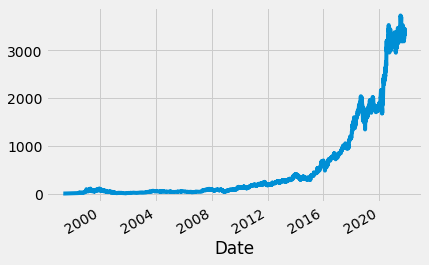

In [6]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

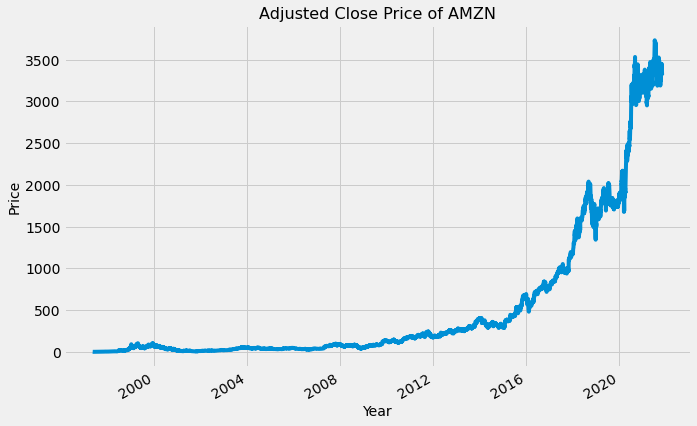

In [7]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
# plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

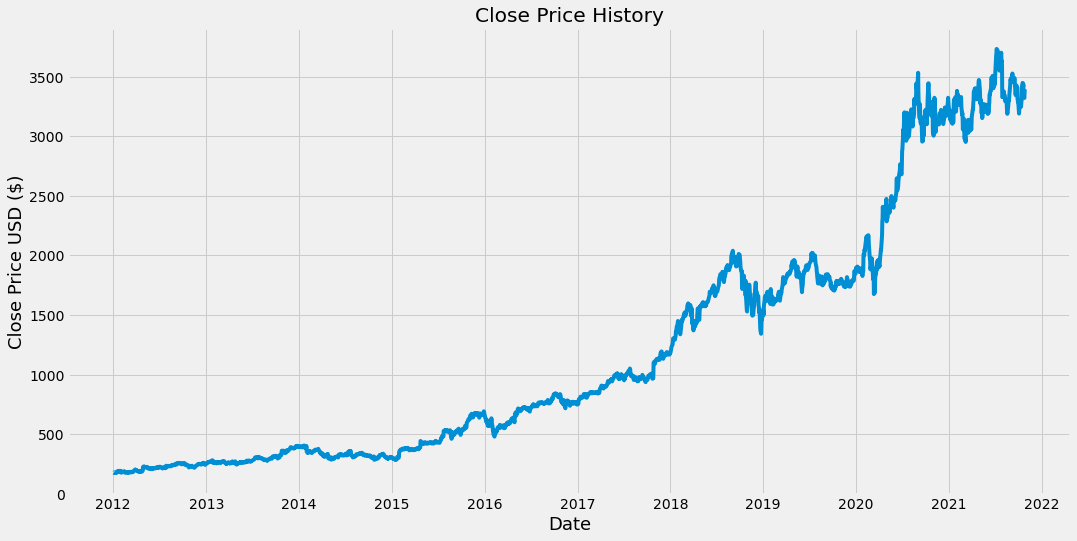

In [8]:
#Visualise the close price

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [9]:
# Extract the 'Close' column in a dataframe

data = df.filter(['Close'])

In [10]:
# Convert the dataframe to a numpy array

dataset = data.values

In [11]:
# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1978

In [12]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71895264e-04],
       [4.44384968e-04],
       [4.72512283e-04],
       ...,
       [8.84392598e-01],
       [9.00058543e-01],
       [9.04676744e-01]])

In [18]:
# Create the training dataset
# Create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

# Split the data to x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=61 :
        print(x_train)
        print(y_train)





[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
       0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
       0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
       0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
       0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
       0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609])]
[0.008066423825883726]
[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00

In [ ]:
# Convert the x_train and y_train to numpy array

